# Basic statistics

## Word Frequency


### Load data

In [37]:
import pickle
import json

from utils.corpus import RawSentence

with open("output/annotated_translated_tokenized_corpus_by_book.pkl", "rb") as file:
    corpus: dict[str, list[RawSentence]] = pickle.load(file)

combined_words = [
    word
    for _, sentences in corpus.items()
    for sentence in sentences
    for word in sentence["words"]
]

total_tokens = len(combined_words)
total_types = len(set(combined_words))

print(f"Total: {total_tokens} ({total_types})")

SAKHALIN_BOOKS = {
    "からふとのアイヌご（入門）",
    "カラフトのアイヌ語（中級）",
    "カラフトのアイヌ語（初級）",
    "ニューエクスプレス・スペシャル 日本語の隣人たち I+II",
    "ピウスツキ記念碑",
    "千徳太郎治のピウスツキ宛書簡",
    "浅井タケ昔話全集I,II",
}

MODERN_WORDS = {"アイヌタイムズ", "プラハ宣言", "ウポポイ館内展示", "萱野茂の国会演説"}


combined_words_hokkaido_traditional = [
    word
    for book, sentences in corpus.items()
    for sentence in sentences
    for word in sentence["words"]
    if book not in SAKHALIN_BOOKS and book not in MODERN_WORDS
]


print(
    f"Hokkaido traditional words: {len(combined_words_hokkaido_traditional)} ({len(set(combined_words_hokkaido_traditional))})"
)
print()

tokens_types_data_by_book = {}

for book, sentences in corpus.items():

    flattened_words = [word for sentence in sentences for word in sentence["words"]]
    tokens = len(flattened_words)
    types = len(set(flattened_words))
    tokens_types_data_by_book[book] = {
        "tokens": tokens,
        "types": types,
    }

    print(f"{book}\t{tokens} ({types})")

with open(f"output/terms_tokens.json", "w") as f:
    json.dump({
        "total": {
            "tokens": total_tokens,
            "types": total_types,
        },
        "by_book": tokens_types_data_by_book,
    }, f, ensure_ascii=False, indent=4)


Total: 1136193 (33607)
Hokkaido traditional words: 956619 (23888)

アイヌ語鵡川方言日本語‐アイヌ語辞典	54828 (5239)
アイヌ語アーカイブ	505373 (11361)
アイヌタイムズ	122271 (9425)
平取町アイヌ口承文芸	125787 (6709)
アイヌ語アーカイブ音声資料	30357 (2804)
AA研アイヌ語資料	87673 (5292)
浅井タケ昔話全集I,II	51195 (3782)
石狩川のアイヌ語（中級）	1175 (418)
アイヌ語會話字典	11681 (2222)
アイヌ語口承文芸コーパス	63453 (3129)
石狩川のアイヌ語（初級）	858 (342)
十勝のアイヌ語（初級）	616 (250)
アイヌ語ラジオ講座テキスト	10284 (1522)
アイヌ民族文化センター研究紀要	14877 (1527)
アイヌ語音声資料	1321 (544)
十勝のアイヌ語（中級）	1235 (387)
沙流のアイヌ語（初級）	505 (219)
カラフトのアイヌ語（中級）	1714 (563)
美幌のアイヌ語（初級）	1599 (356)
鍋沢元蔵筆録ノート	14444 (2155)
アコㇿイタㇰ	1600 (343)
千徳太郎治のピウスツキ宛書簡	1883 (539)
沙流のアイヌ語（中級）	1249 (414)
カムイユカㇻを聞いてアイヌ語を学ぶ	2770 (718)
ニューエクスプレスプラス アイヌ語	3596 (782)
萱野茂の国会演説	365 (137)
アイヌ神謡集	8814 (1405)
幌別のアイヌ語（初級）	1588 (381)
幌別のアイヌ語（中級）	1259 (430)
ちとせのアイヌご（入門）	410 (174)
千歳のアイヌ語（初級）	1608 (391)
静内のアイヌ語（初級）	734 (289)
静内のアイヌ語（中級）	1408 (432)
プラハ宣言	849 (168)
美幌のアイヌ語（中級）	1117 (345)
びほろのあいぬご（入門）	407 (176)
ほろべつのアイヌご（入門）	411 (174)
カラフトのアイヌ語（初級）	706 (330)
千歳のアイヌ語（中級）	1253 (424)
さるのアイヌご（入門）

### Bar chart


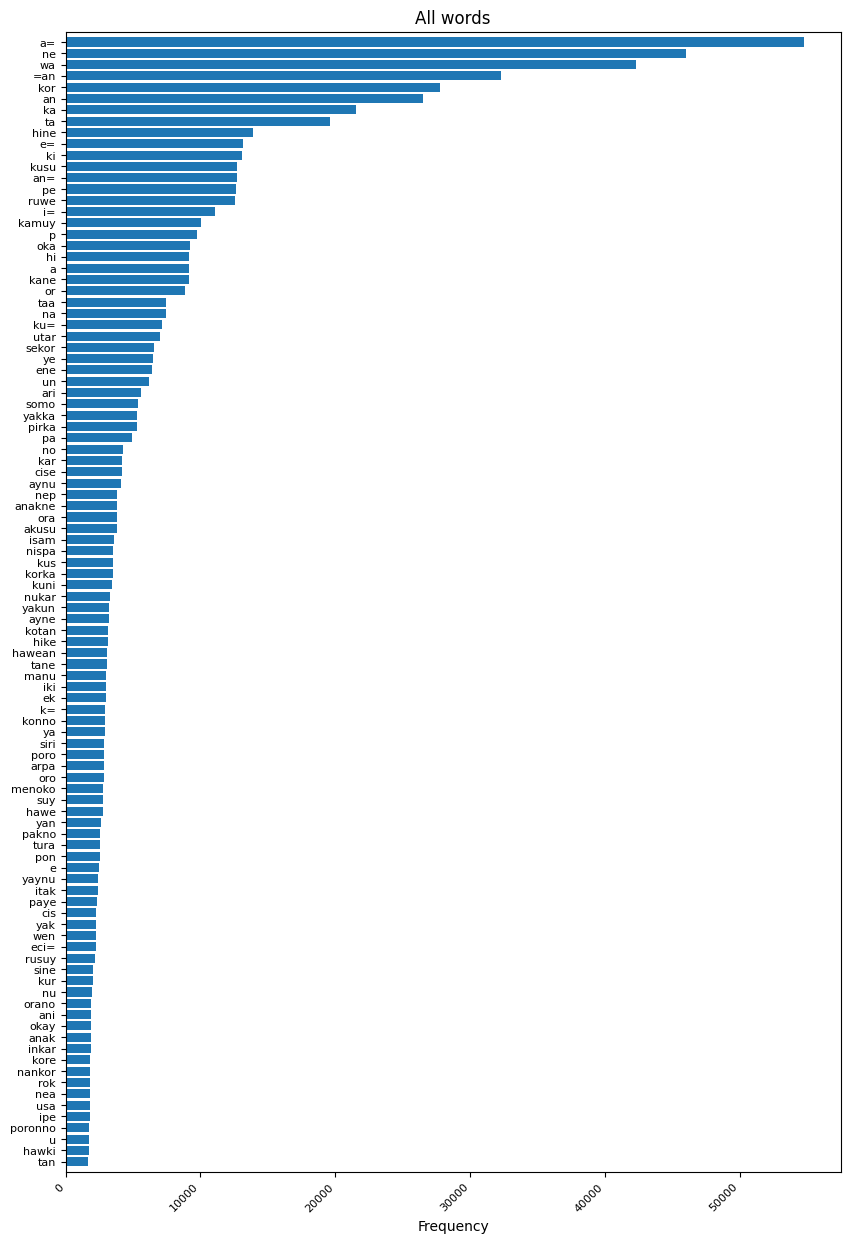

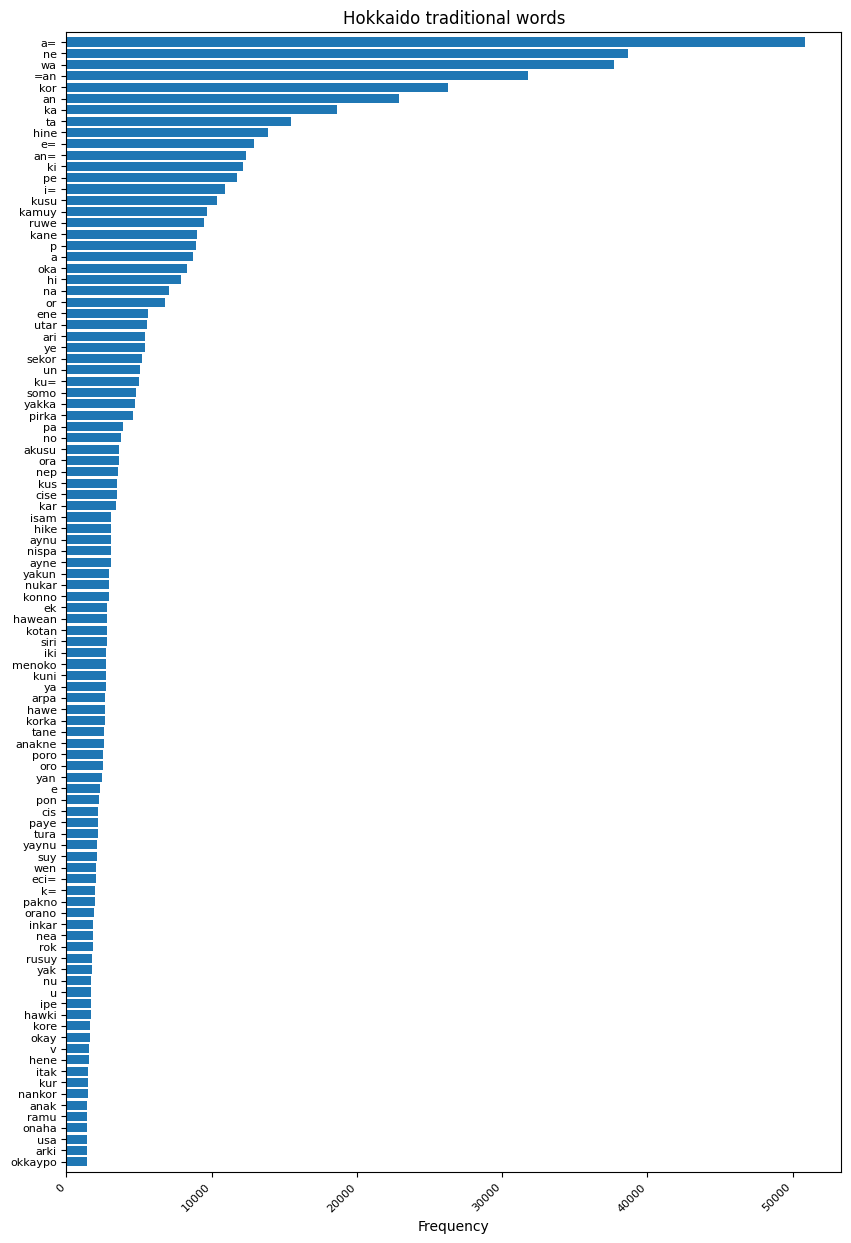

In [23]:
from matplotlib import pyplot as plt

from collections import Counter

combined_words_counter = Counter(combined_words)

plt.figure(figsize=(10, 30))
plt.barh(*zip(*reversed(combined_words_counter.most_common(100))))
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.yticks(rotation=0, ha="right", fontsize=8)
plt.subplots_adjust(bottom=0.5)
plt.title("All words")
plt.xlabel("Frequency")
plt.margins(y=0.005)
plt.show()

combined_words_hokkaido_traditional_counter = Counter(combined_words_hokkaido_traditional)

plt.figure(figsize=(10, 30))
plt.barh(*zip(*reversed(combined_words_hokkaido_traditional_counter.most_common(100))))
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.yticks(rotation=0, ha="right", fontsize=8)
plt.subplots_adjust(bottom=0.5)
plt.title("Hokkaido traditional words")
plt.xlabel("Frequency")
plt.margins(y=0.005)
plt.show()


### Word Cloud

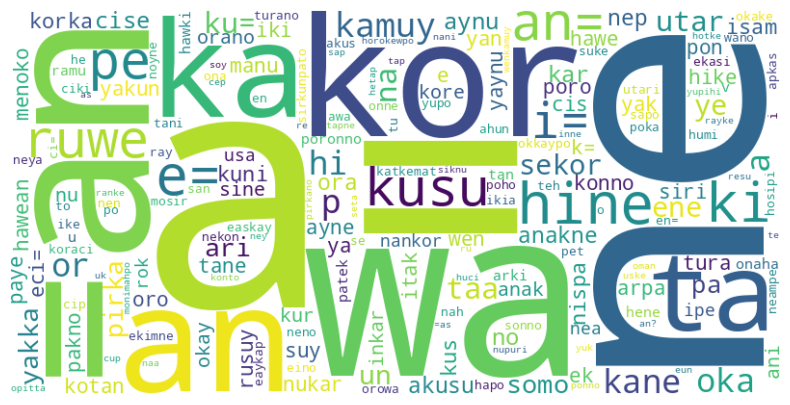

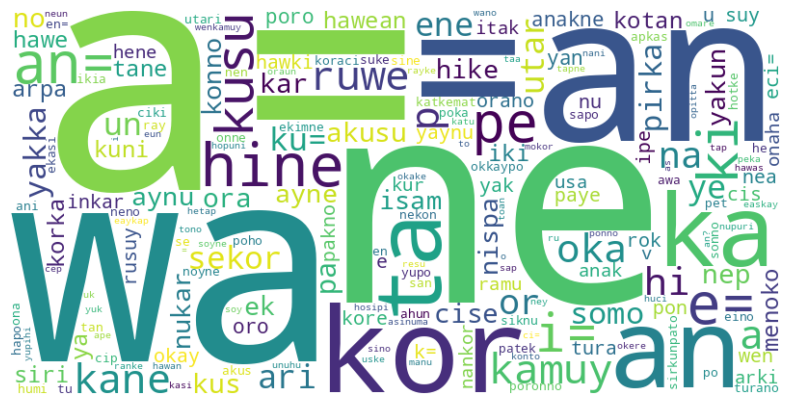

In [26]:
import wordcloud as wc

wordcloud = wc.WordCloud(
    width=800, height=400, background_color="white"
).generate_from_frequencies(combined_words_counter)
plt.figure(figsize=(18, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

wordcloud_traditional = wc.WordCloud(
    width=800, height=400, background_color="white"
).generate_from_frequencies(combined_words_hokkaido_traditional_counter)
plt.figure(figsize=(18, 5))
plt.imshow(wordcloud_traditional, interpolation="bilinear")
plt.axis("off")
plt.show()


## N-Grams


In [33]:
from nltk.util import ngrams
from collections import Counter

n = 2
ngrams = ngrams(combined_words, n)
ngram_counts = Counter(ngrams)
for ngram, count in ngram_counts.most_common(100):
    print(f"{' '.join(ngram):10}\t{count:5}")

ruwe ne   	10217
a= kor    	 8710
oka =an   	 4793
pe ne     	 4766
or ta     	 4704
an pe     	 4260
ne kusu   	 3724
=an wa    	 3629
wa a=     	 3502
=an hine  	 3472
p ne      	 3242
a= ye     	 3096
ne wa     	 3083
somo ki   	 2975
ne na     	 2948
an= an    	 2804
ne yakka  	 2741
ka somo   	 2674
ka a=     	 2449
ari an    	 2096
ene an    	 2074
a= kar    	 2059
a p       	 2052
ne ya     	 2028
=an ruwe  	 2007
an hi     	 2005
an wa     	 1966
=an kor   	 1966
ne ruwe   	 1961
a= ki     	 1939
or un     	 1933
wa an     	 1902
ne a      	 1793
pe a=     	 1785
ki wa     	 1729
yaynu =an 	 1662
paye =an  	 1594
sekor hawean	 1578
=an kane  	 1510
ki no     	 1501
hine a=   	 1440
kane oka  	 1407
an ruwe   	 1378
ta a=     	 1369
kusu ne   	 1348
nep ka    	 1342
kor wa    	 1327
inkar =an 	 1313
a= ne     	 1301
wa ne     	 1285
okay pe   	 1268
a= nukar  	 1263
=an pe    	 1245
oro ta    	 1223
wa isam   	 1205
wa i=     	 1192
wa e=     	 1156
wa an=    	 1149
=an ayne  	 

## TF-IDF

In [85]:
# TF-IDF
from typing import cast
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy import sparse
import json

def compute_tf_idf(corpus: dict[str, list[RawSentence]]):
    documents = {
        doc_id: "∥".join(word for sentence in sentences for word in sentence["words"])
        for doc_id, sentences in corpus.items()
    }

    vectorizer = TfidfVectorizer(
        tokenizer=lambda x: x.split("∥"), preprocessor=None
    )
    tfidf_matrix = cast(sparse.csr_matrix, vectorizer.fit_transform(documents.values()))
    feature_names = vectorizer.get_feature_names_out()

    tf_idf_scores = {}
    for doc_idx, doc_id in enumerate(documents.keys()):
        # Extract the non-zero elements for the document
        row = tfidf_matrix.getrow(doc_idx)  # Ensure we work with a sparse row
        non_zero_indices = row.indices
        tf_idf_scores[doc_id] = {
            feature_names[idx]: row[0, idx] for idx in non_zero_indices
        }

    return tf_idf_scores


# Example usage
tf_idf_scores = compute_tf_idf(corpus)


with open("output/tf_idf_scores3.json", "w") as f:
    json.dump(tf_idf_scores, f, ensure_ascii=False, indent=4)

/home/mkpoli/projects/Ainu/ainu-corpora-process/.venv/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


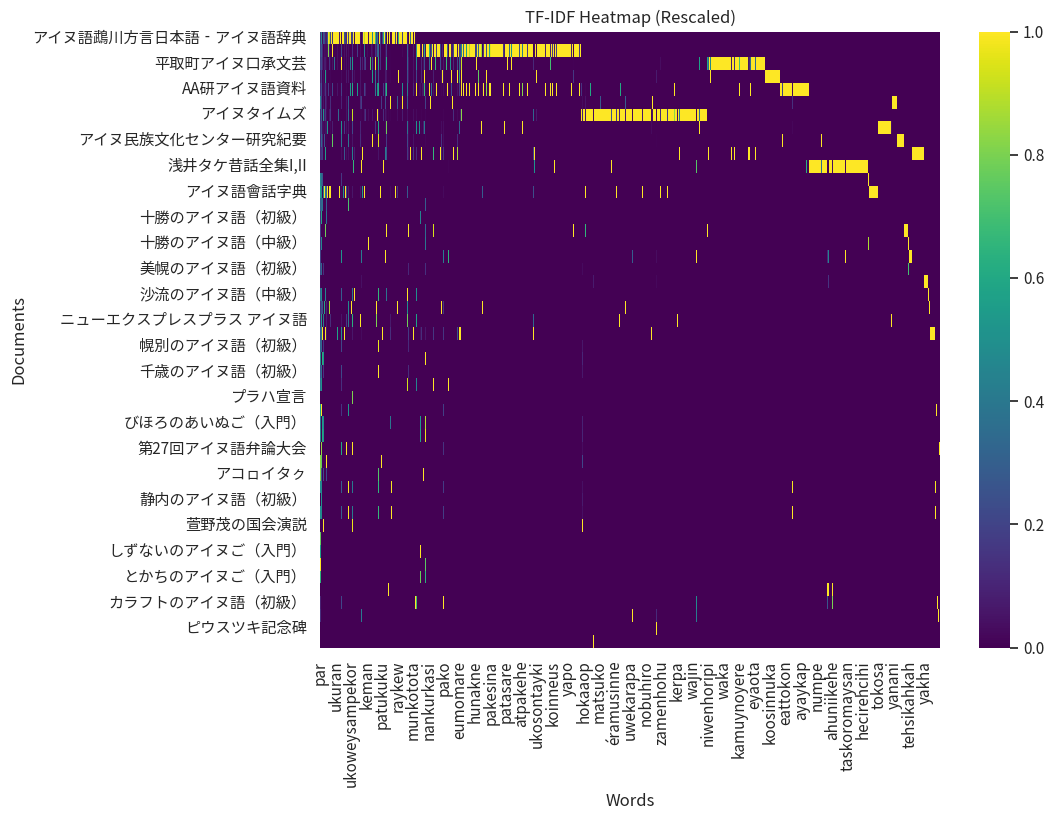

In [86]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.font_manager import FontProperties, fontManager
from sklearn.preprocessing import MinMaxScaler

font_path = "../fonts/NotoSansCJK-Regular.ttc"
fontManager.addfont(font_path)
font_prop = FontProperties(fname=font_path)

plt.rcParams["font.family"] = ["Noto Sans CJK JP"]

def visualize_tfidf_heatmap(tf_idf_scores):
    # Convert to DataFrame
    tfidf_df = pd.DataFrame.from_dict(tf_idf_scores, orient="index").fillna(0)

    # Rescale values between 0 and 1
    scaler = MinMaxScaler()
    tfidf_rescaled = pd.DataFrame(
        scaler.fit_transform(tfidf_df), index=tfidf_df.index, columns=tfidf_df.columns
    )

    # Plot heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(tfidf_rescaled, cmap="viridis", annot=False, cbar=True)
    plt.title("TF-IDF Heatmap (Rescaled)")
    plt.xlabel("Words")
    plt.ylabel("Documents")
    plt.show()


# Example usage
visualize_tfidf_heatmap(tf_idf_scores)

/home/mkpoli/projects/Ainu/ainu-corpora-process/.venv/lib/python3.13/site-packages/seaborn/utils.py:61: UserWarning: Glyph 27973 (\N{CJK UNIFIED IDEOGRAPH-6D45}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/mkpoli/projects/Ainu/ainu-corpora-process/.venv/lib/python3.13/site-packages/seaborn/utils.py:61: UserWarning: Glyph 20117 (\N{CJK UNIFIED IDEOGRAPH-4E95}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/mkpoli/projects/Ainu/ainu-corpora-process/.venv/lib/python3.13/site-packages/seaborn/utils.py:61: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/mkpoli/projects/Ainu/ainu-corpora-process/.venv/lib/python3.13/site-packages/seaborn/utils.py:61: UserWarning: Glyph 12465 (\N{KATAKANA LETTER KE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/mkpoli/projects/Ainu/ainu-corpora-process/.venv/lib/python3.13/site-packages/seaborn/utils.py:61: UserWarning: Glyph 26132 (\N{CJK UNIFIED IDEOGRA

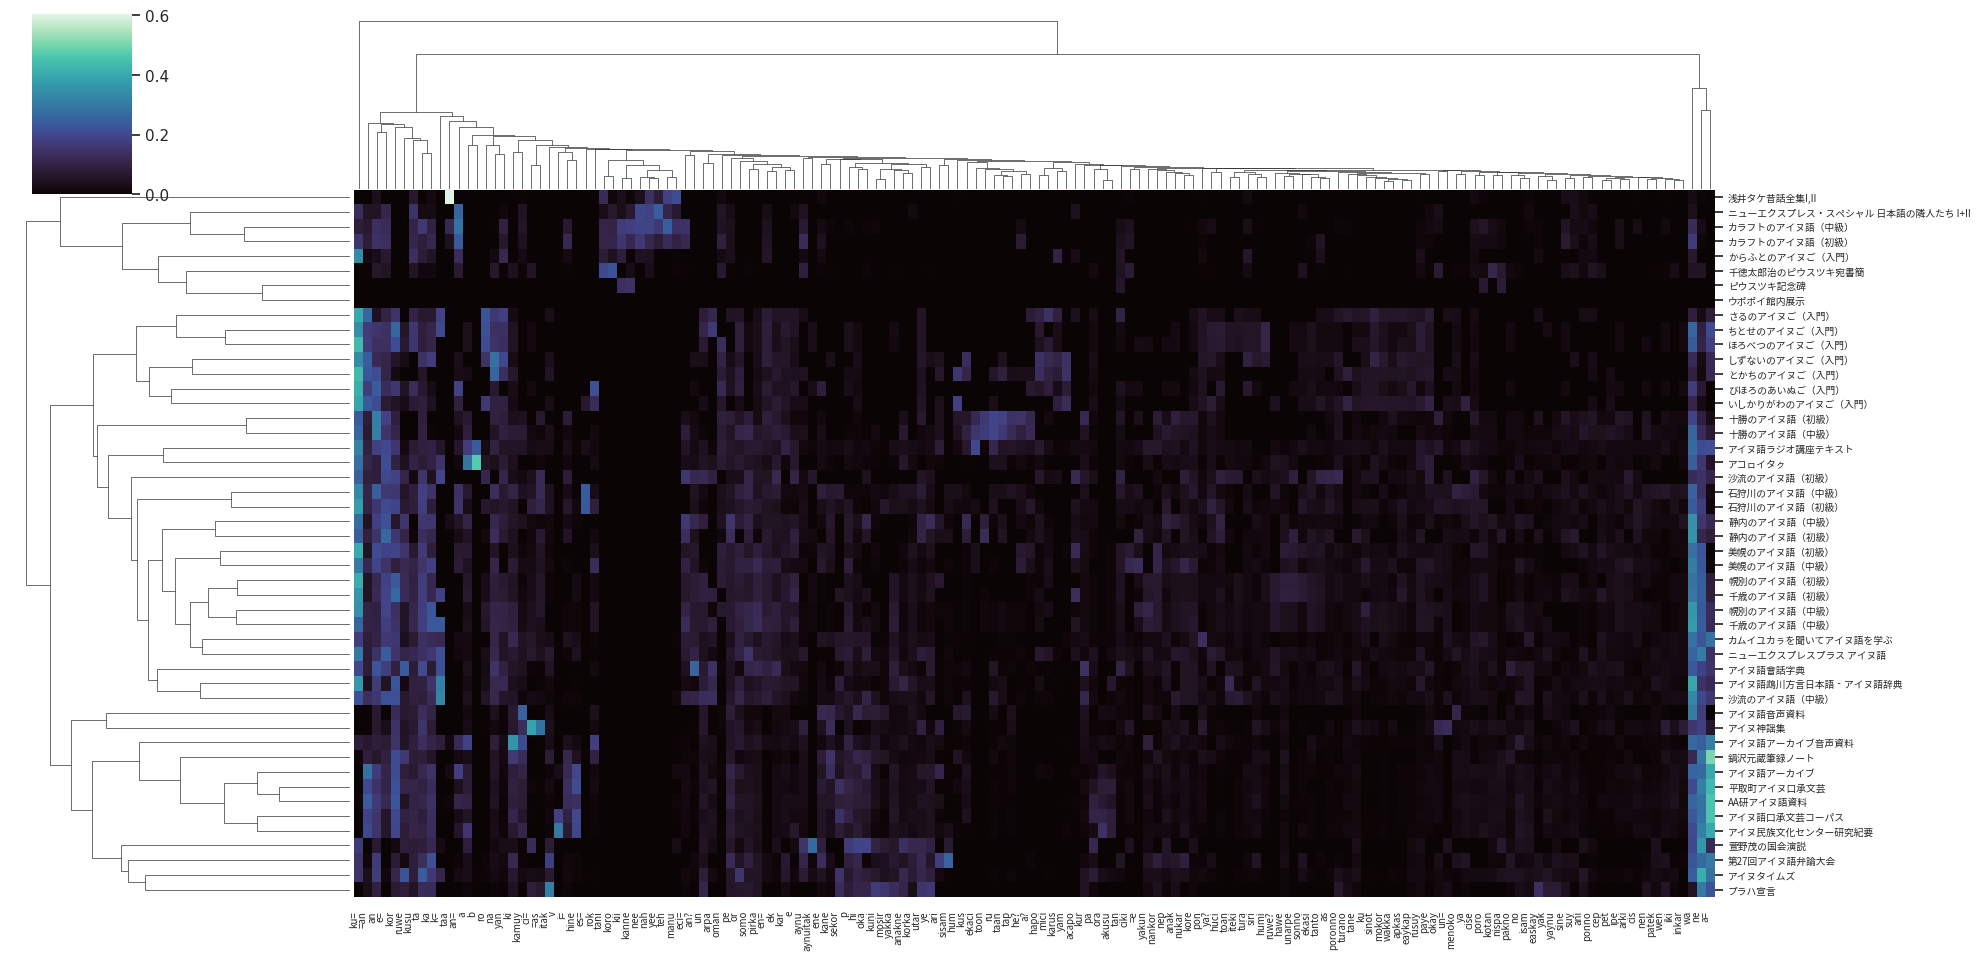

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

font_path = "../fonts/NotoSansCJK-Regular.ttc"
fontManager.addfont(font_path)
font_prop = FontProperties(fname=font_path)

plt.rcParams["font.family"] = ["Noto Sans CJK JP"]


def visualize_tfidf_heatmap(tf_idf_scores, top_n_words=150, top_n_docs=50):
    plt.rcParams["font.family"] = ["Noto Sans CJK JP"]
    fontManager.addfont(font_path)
    font_prop = FontProperties(fname=font_path, size=7)

    # Convert scores to DataFrame
    tfidf_df = pd.DataFrame.from_dict(tf_idf_scores, orient="index").fillna(0)

    # (Optional) focus on top words and docs
    if top_n_words and top_n_words < len(tfidf_df.columns):
        word_sums = tfidf_df.sum().sort_values(ascending=False)
        top_words = word_sums.head(top_n_words).index
    else:
        top_words = tfidf_df.columns

    if top_n_docs and top_n_docs < len(tfidf_df.index):
        doc_sums = tfidf_df.sum(axis=1).sort_values(ascending=False)
        top_docs = doc_sums.head(top_n_docs).index
    else:
        top_docs = tfidf_df.index

    # Subset the DataFrame
    tfidf_subset = tfidf_df.loc[top_docs, top_words]

    # Apply log transform for better contrast
    tfidf_log = np.log1p(tfidf_subset)

    # Set a pleasing style
    sns.set_theme(style="white")

    # Create a cluster map with all ticks shown
    g = sns.clustermap(
        tfidf_log,
        cmap="mako",
        linewidths=0,
        figsize=(20, 10),
        metric="euclidean",
        method="average",
        xticklabels=1,  # Show all column labels
        yticklabels=1,  # Show all row labels,
        cbar_kws={"shrink": 1, "pad": 0.5, "orientation": "vertical"},  # Shrink the color bar
    )

    # Rotate and adjust tick labels
    plt.setp(
        g.ax_heatmap.get_xticklabels(),
        rotation=90,
        ha="right",
        fontsize=8,
        fontproperties=font_prop,
    )
    plt.setp(
        g.ax_heatmap.get_yticklabels(), rotation=0, fontsize=8, fontproperties=font_prop
    )

    # Adjust title and layout
    # g.ax_heatmap.set_title(
    #     "TF-IDF Heatmap (Clustered & Log-Transformed)",
    #     fontsize=12,
    #     fontproperties=font_prop,
    #     pad=20,
    # )

    # Show the plot
    plt.savefig("output/tf-idf-clustering-heatmap.png", dpi=350)
    plt.show()


# Example usage:
visualize_tfidf_heatmap(tf_idf_scores)

/home/mkpoli/projects/Ainu/ainu-corpora-process/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 27973 (\N{CJK UNIFIED IDEOGRAPH-6D45}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/mkpoli/projects/Ainu/ainu-corpora-process/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20117 (\N{CJK UNIFIED IDEOGRAPH-4E95}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/mkpoli/projects/Ainu/ainu-corpora-process/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/mkpoli/projects/Ainu/ainu-corpora-process/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12465 (\N{KATAKANA LETTER KE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/mkpoli/project

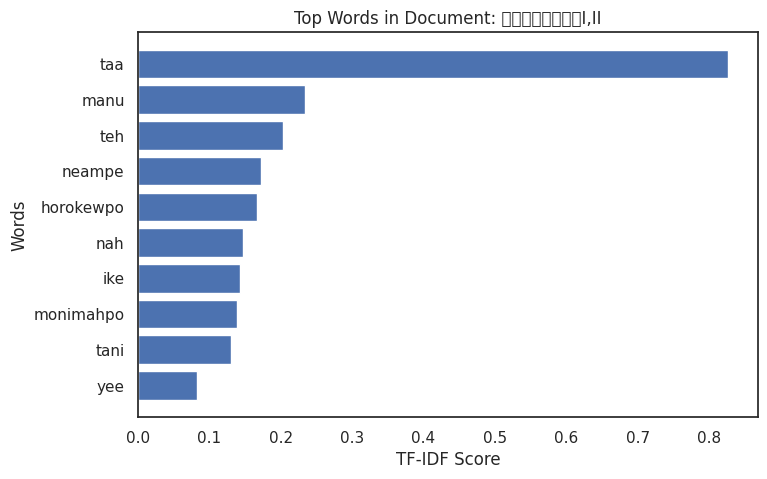

In [88]:
def visualize_tfidf_barchart(tf_idf_scores, doc_id):
    # Get the top words by TF-IDF score
    top_words = sorted(tf_idf_scores[doc_id].items(), key=lambda x: x[1], reverse=True)[
        :10
    ]
    words, scores = zip(*top_words)

    # Plot bar chart
    plt.figure(figsize=(8, 5))
    plt.barh(words, scores)
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.title(f"Top Words in Document: {doc_id}")
    plt.xlabel("TF-IDF Score")
    plt.ylabel("Words")
    plt.show()


# Example usage
# visualize_tfidf_barchart(tf_idf_scores, doc_id="萱野茂の国会演説")
# visualize_tfidf_barchart(tf_idf_scores, doc_id="アイヌ語ラジオ講座テキスト")
# visualize_tfidf_barchart(tf_idf_scores, doc_id="アイヌタイムズ")
visualize_tfidf_barchart(tf_idf_scores, doc_id="浅井タケ昔話全集I,II")

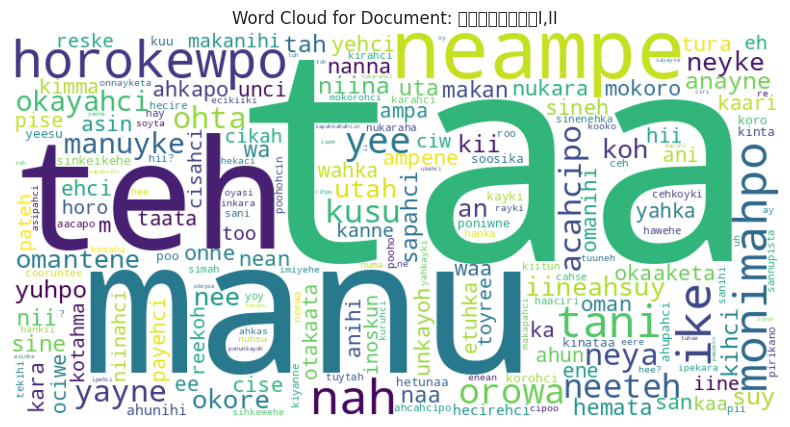

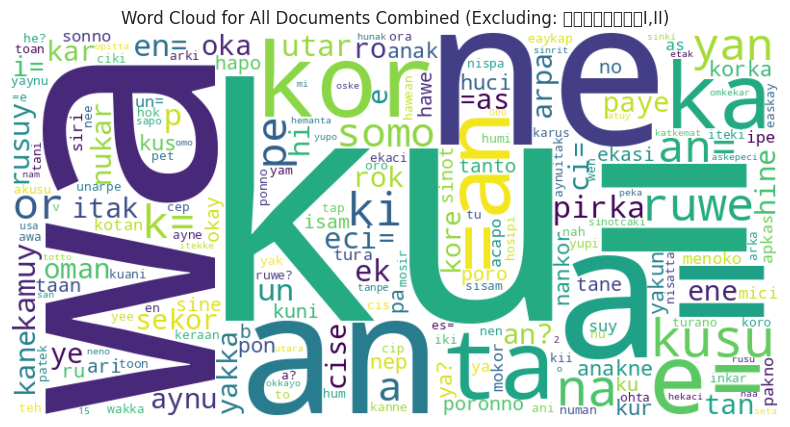

In [89]:
from wordcloud import WordCloud


def visualize_tfidf_wordcloud(tf_idf_scores, doc_id):
    # Generate word cloud data
    wordcloud = WordCloud(
        width=800, height=400, background_color="white"
    ).generate_from_frequencies(tf_idf_scores[doc_id])

    # Display word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for Document: {doc_id}")
    plt.show()


# Example usage
visualize_tfidf_wordcloud(tf_idf_scores, doc_id="浅井タケ昔話全集I,II")

def visualize_tfidf_wordcloud_all_docs_combined_except(tf_idf_scores, except_doc_id: str): 
    combined_scores = {}
    for doc_id, scores in tf_idf_scores.items():
        if doc_id == except_doc_id:
            continue
        for word, score in scores.items():
            combined_scores[word] = combined_scores.get(word, 0) + score

    # Generate the word cloud
    wordcloud = WordCloud(
        width=800, height=400, background_color="white"
    ).generate_from_frequencies(combined_scores)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for All Documents Combined (Excluding: {except_doc_id})")
    plt.show()

# Example usage
visualize_tfidf_wordcloud_all_docs_combined_except(
    tf_idf_scores, except_doc_id="浅井タケ昔話全集I,II"
)


# visualize_tfidf_wordcloud(tf_idf_scores, doc_id="浅井タケ昔話全集I,II")

/tmp/ipykernel_1305845/2405842028.py:26: UserWarning: Glyph 12450 (\N{KATAKANA LETTER A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1305845/2405842028.py:26: UserWarning: Glyph 12452 (\N{KATAKANA LETTER I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1305845/2405842028.py:26: UserWarning: Glyph 12492 (\N{KATAKANA LETTER NU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1305845/2405842028.py:26: UserWarning: Glyph 35486 (\N{CJK UNIFIED IDEOGRAPH-8A9E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1305845/2405842028.py:26: UserWarning: Glyph 40289 (\N{CJK UNIFIED IDEOGRAPH-9D61}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1305845/2405842028.py:26: UserWarning: Glyph 24029 (\N{CJK UNIFIED IDEOGRAPH-5DDD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1305845/2405842028.py:26: UserWarning: Glyph 26041 (\N{CJK UNIFIED IDEOGRAPH-65B9}) mis

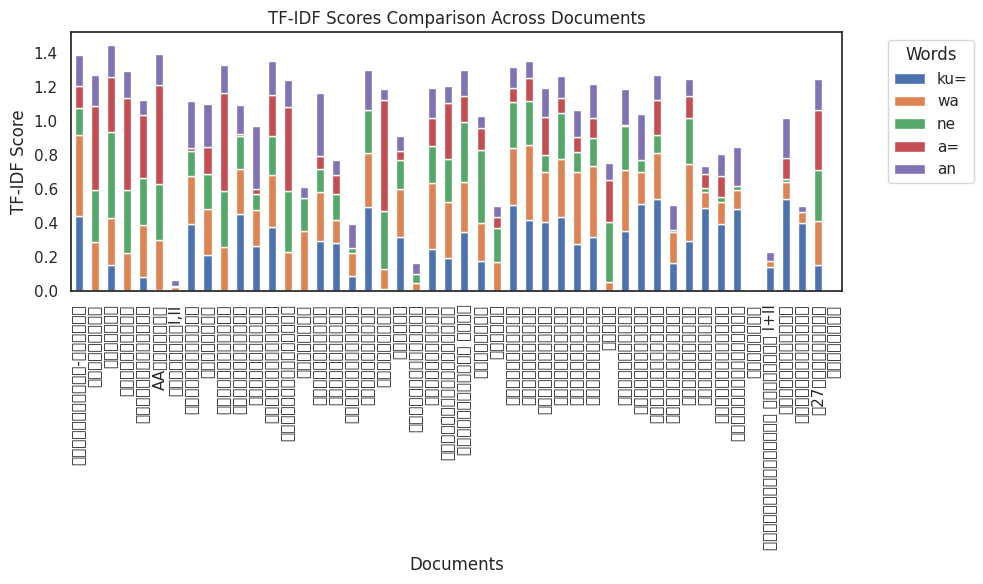

In [90]:
def visualize_tfidf_comparison(tf_idf_scores, top_n=5):
    # Aggregate top words across all documents
    all_words = {word for scores in tf_idf_scores.values() for word in scores}
    word_totals = {
        word: sum(scores.get(word, 0) for scores in tf_idf_scores.values())
        for word in all_words
    }
    top_words = sorted(word_totals.items(), key=lambda x: x[1], reverse=True)[:top_n]

    # Prepare data
    words, _ = zip(*top_words)
    comparison_df = pd.DataFrame(
        {
            doc_id: [tf_idf_scores[doc_id].get(word, 0) for word in words]
            for doc_id in tf_idf_scores.keys()
        },
        index=words,
    )

    # Plot stacked bar chart
    comparison_df.T.plot(kind="bar", stacked=True, figsize=(10, 6))
    plt.title("TF-IDF Scores Comparison Across Documents")
    plt.xlabel("Documents")
    plt.ylabel("TF-IDF Score")
    plt.legend(title="Words", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()


# Example usage
visualize_tfidf_comparison(tf_idf_scores)

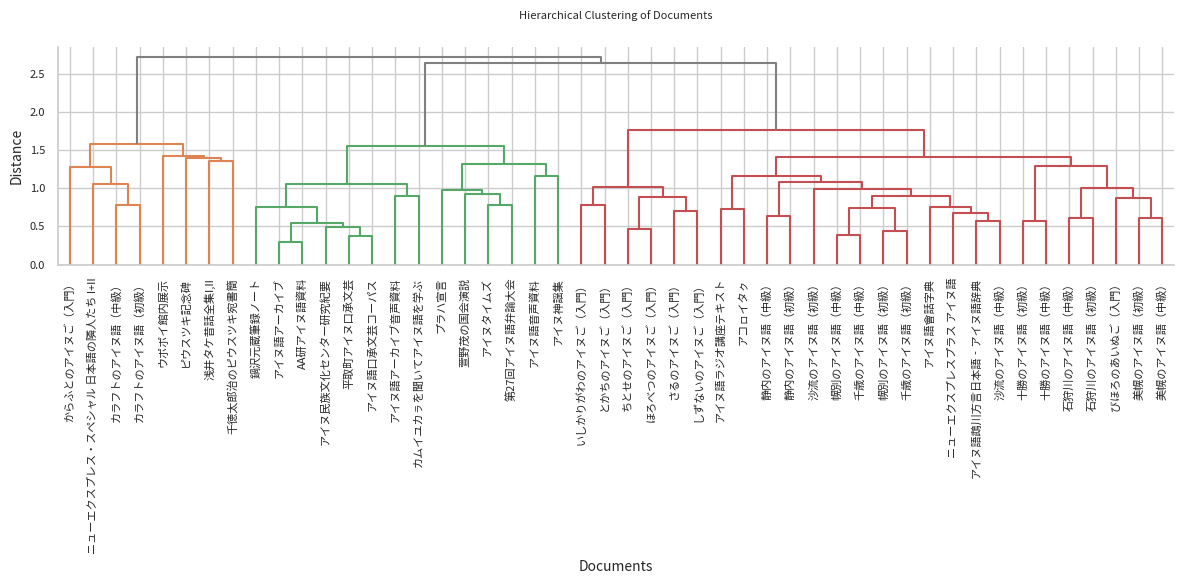

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from scipy.cluster.hierarchy import linkage, dendrogram
import seaborn as sns

def visualize_document_clustering(
    tf_idf_scores, font_path, method="ward", metric="euclidean", figsize=(12, 6)
):
    # Load the custom font
    plt.rcParams["font.family"] = ["Noto Sans CJK JP"]
    fontManager.addfont(font_path)
    font_prop = FontProperties(fname=font_path, size=8)

    # Convert TF-IDF scores into a DataFrame
    # Rows: documents, Columns: words
    tfidf_df = pd.DataFrame.from_dict(tf_idf_scores, orient="index").fillna(0)

    # Perform hierarchical clustering
    # `method` can be 'ward', 'complete', 'average', etc.
    # `metric` can be 'euclidean', 'cosine', etc.
    linkage_matrix = linkage(tfidf_df, method=method, metric=metric)

    # Set a visual theme
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=figsize)

    # Plot the dendrogram
    # `labels=tfidf_df.index` ensures document IDs appear on the dendrogram
    dendro = dendrogram(
        linkage_matrix,
        labels=tfidf_df.index.tolist(),
        leaf_rotation=90,  # Rotate labels 90 degrees for readability
        leaf_font_size=8,  # Smaller font size for documents
        above_threshold_color="gray",
        orientation="top",  # Put leaves at the bottom, dendrogram on top
    )

    # Title and axis formatting
    plt.title(
        "Hierarchical Clustering of Documents",
        fontsize=14,
        fontproperties=font_prop,
        pad=20,
    )
    plt.xlabel("Documents", fontsize=10, fontproperties=font_prop)
    plt.ylabel("Distance", fontsize=10, fontproperties=font_prop)

    # Apply font properties to tick labels
    plt.xticks(fontproperties=font_prop)
    plt.yticks(fontproperties=font_prop)

    # Remove top and right spines for a cleaner look
    sns.despine()

    # Tight layout for better spacing
    plt.tight_layout()

    plt.savefig("output/tf_idf_clustering_dendrogram.png", dpi=350)
    plt.show()

visualize_document_clustering(tf_idf_scores, "../fonts/NotoSansCJK-Regular.ttc")

/tmp/ipykernel_1305845/1199796161.py:87: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


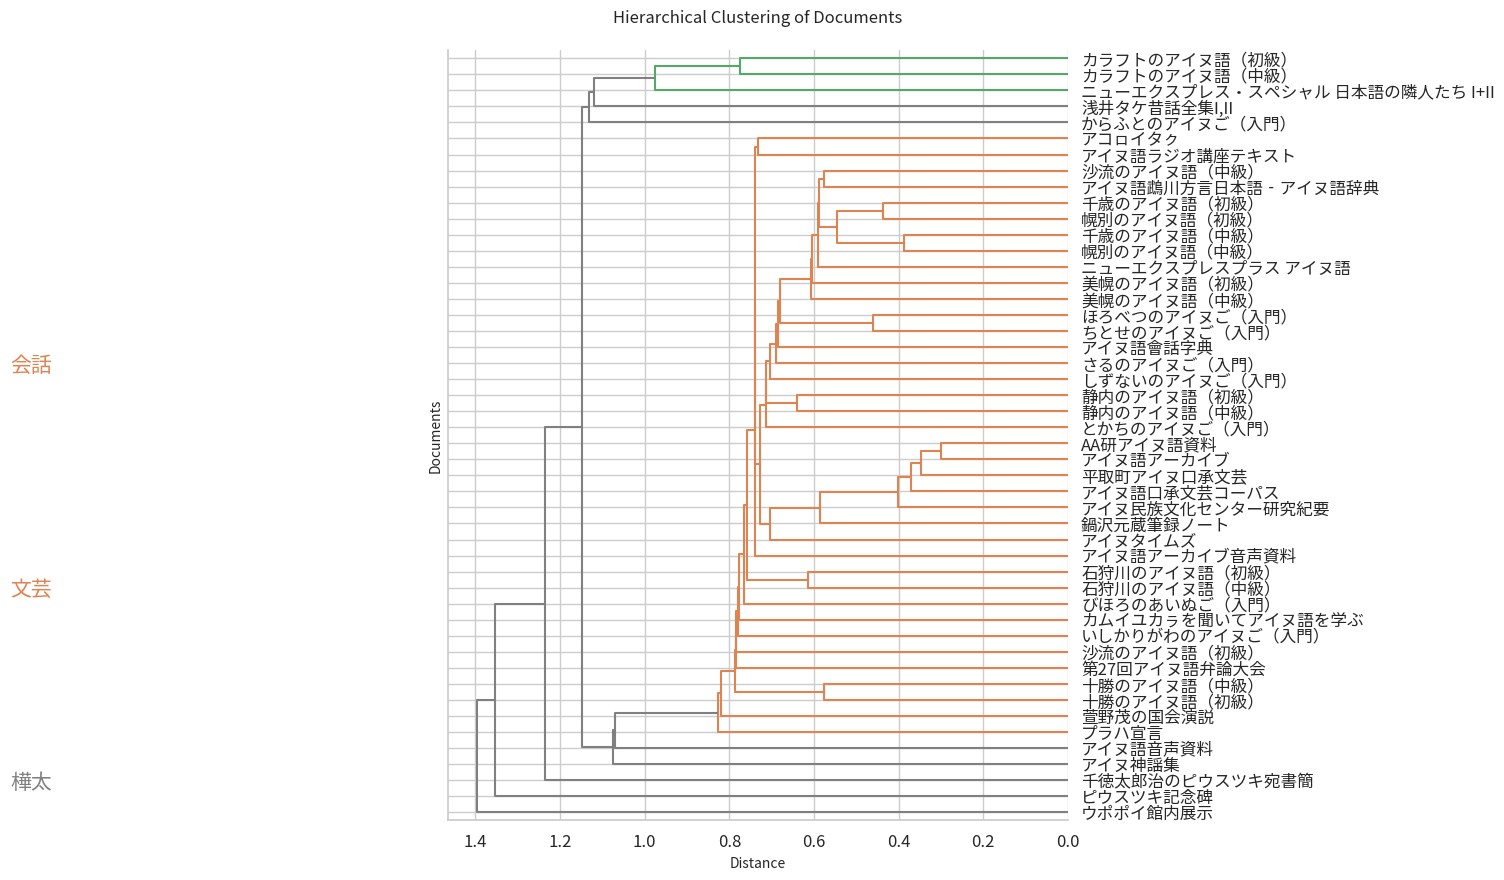

/tmp/ipykernel_1305845/1199796161.py:87: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


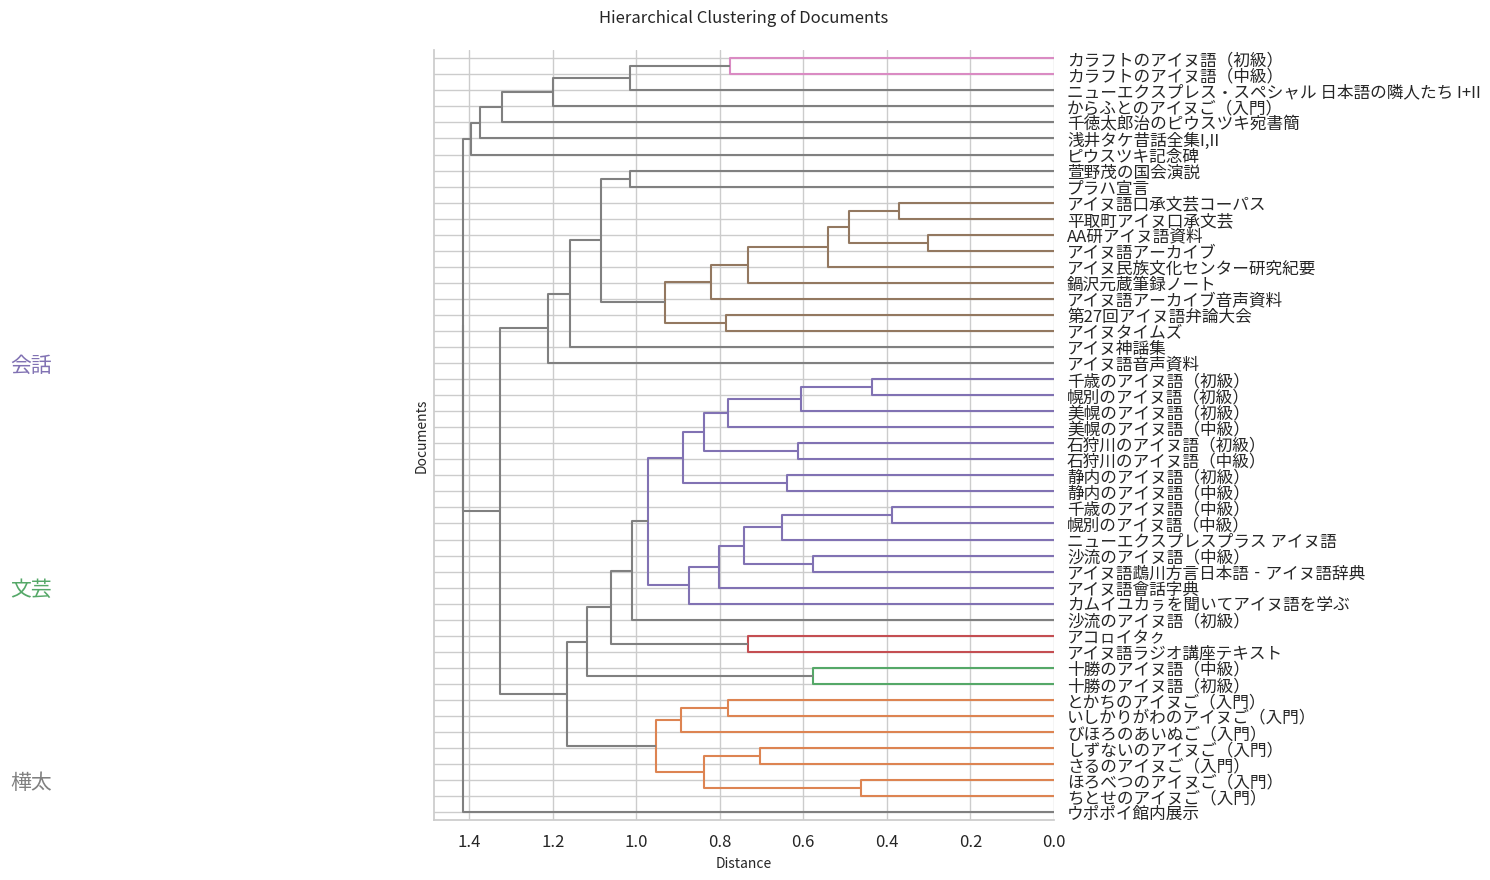

/tmp/ipykernel_1305845/1199796161.py:87: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


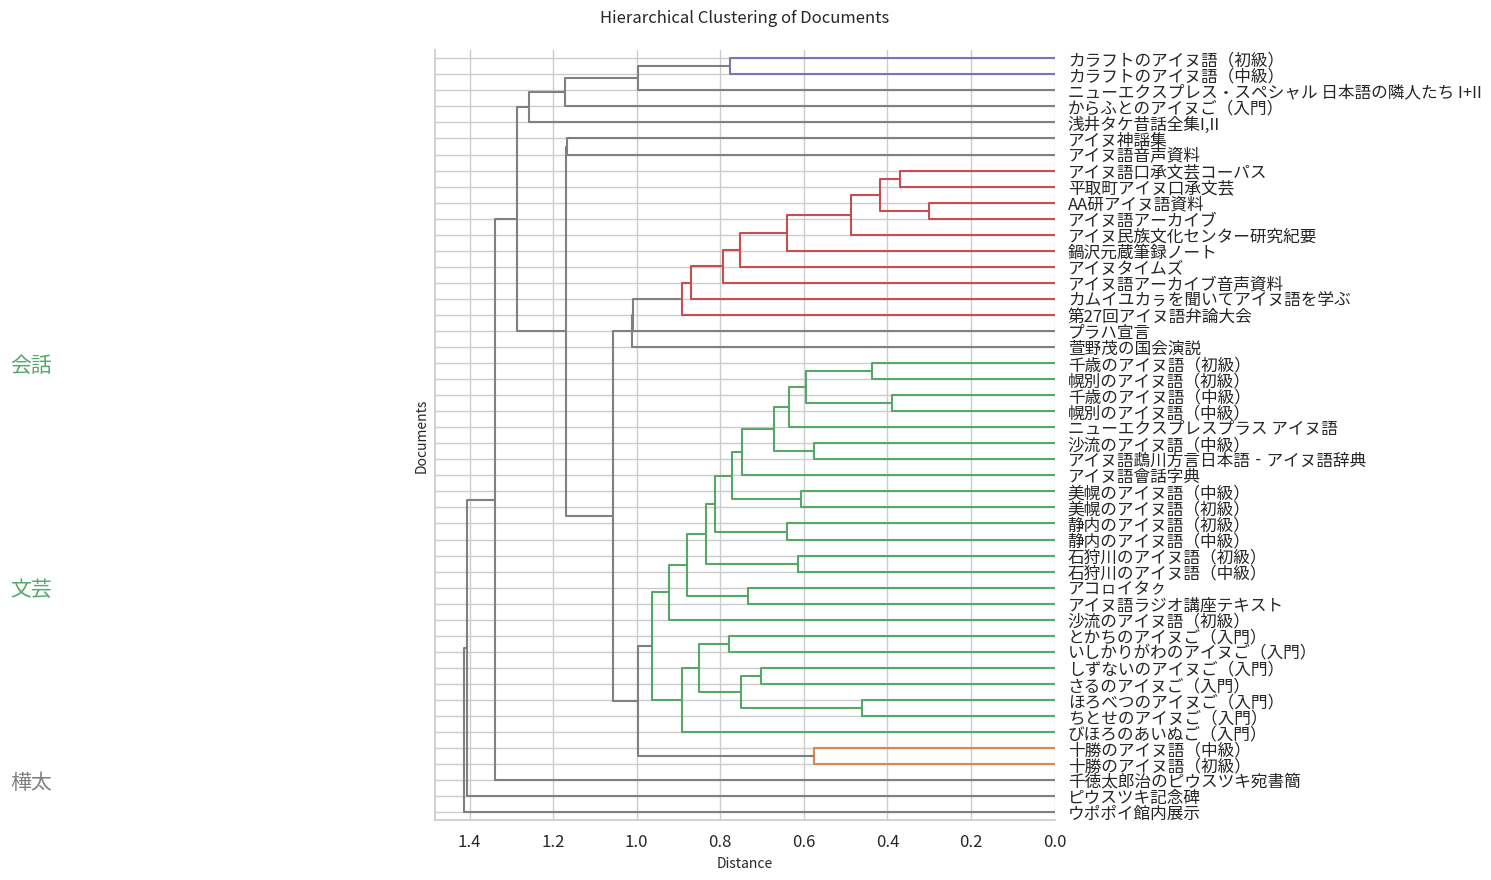

/tmp/ipykernel_1305845/1199796161.py:87: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


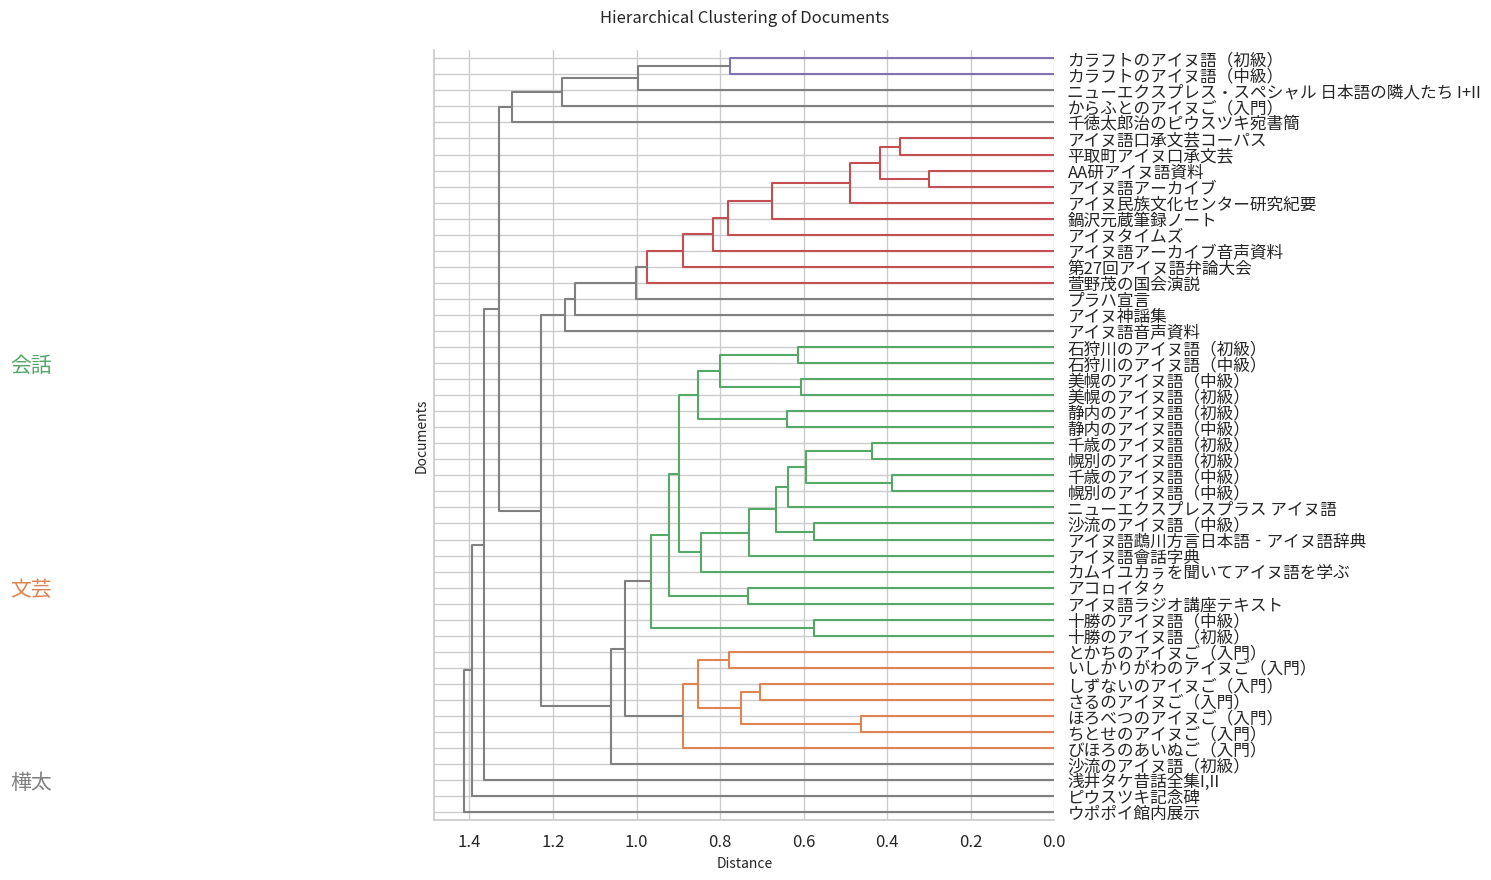

/tmp/ipykernel_1305845/1199796161.py:87: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


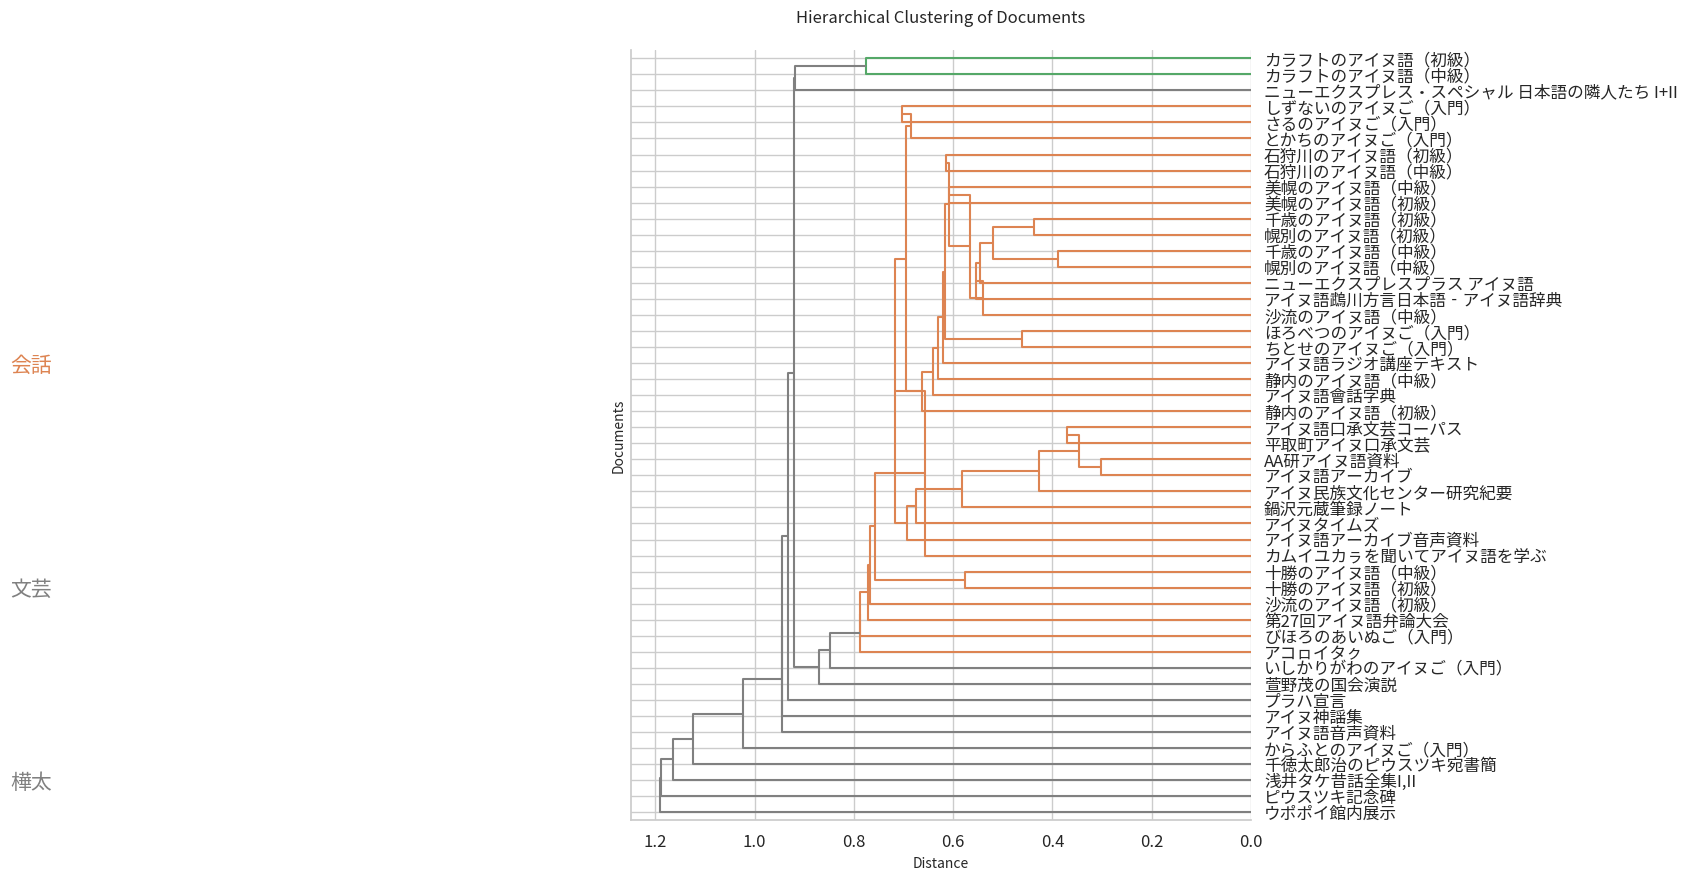

/tmp/ipykernel_1305845/1199796161.py:87: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


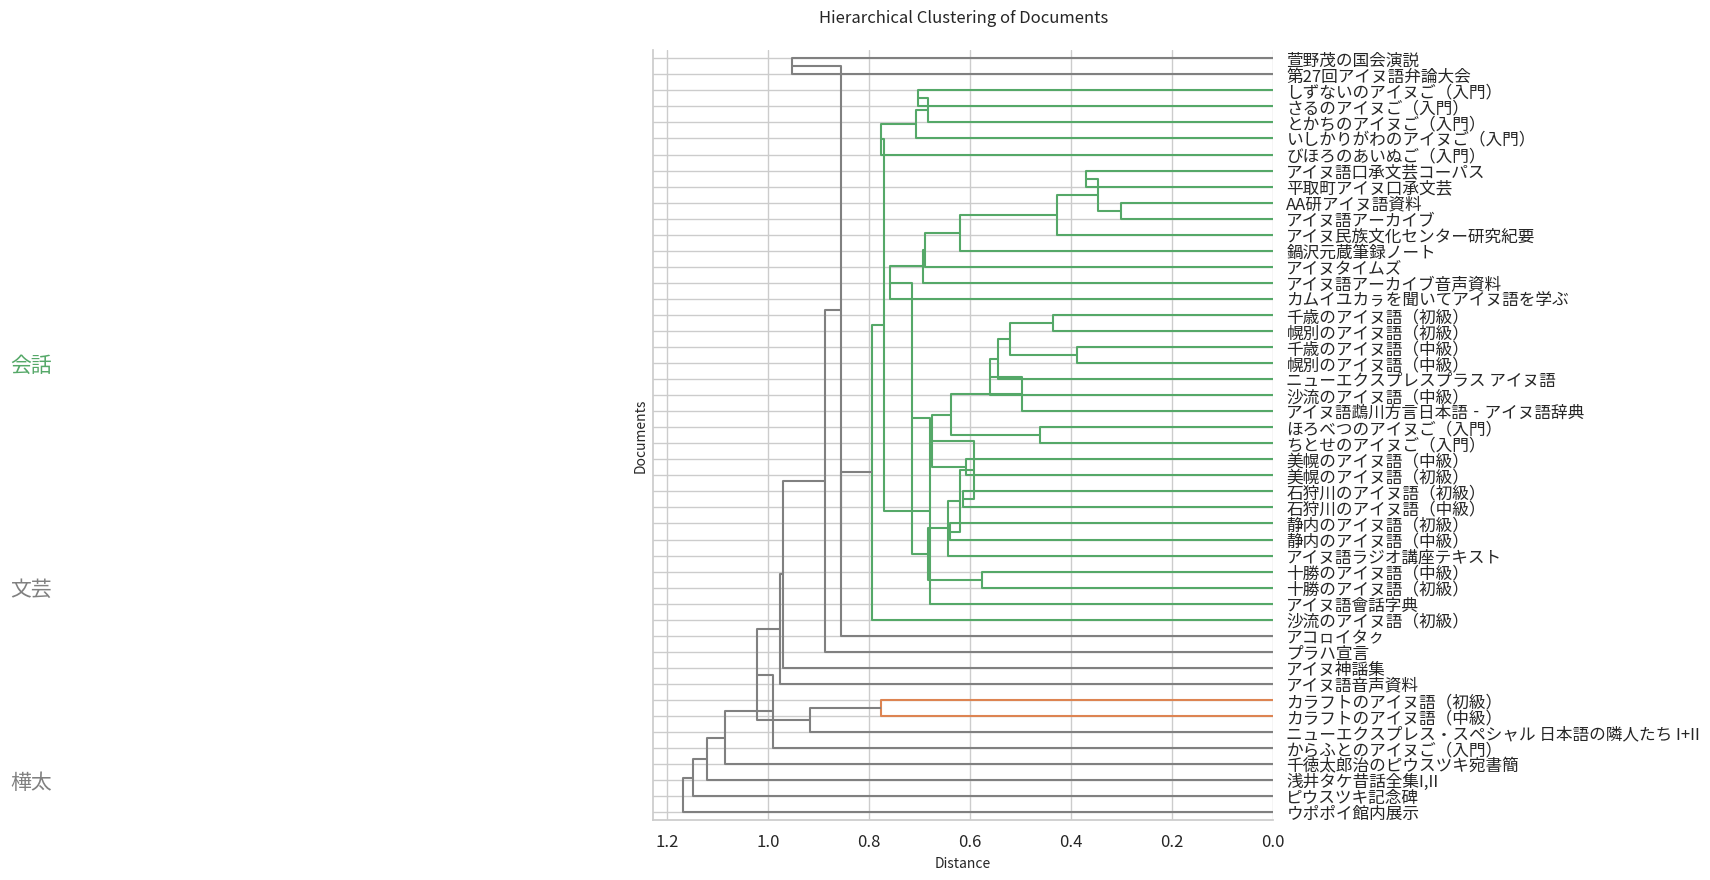

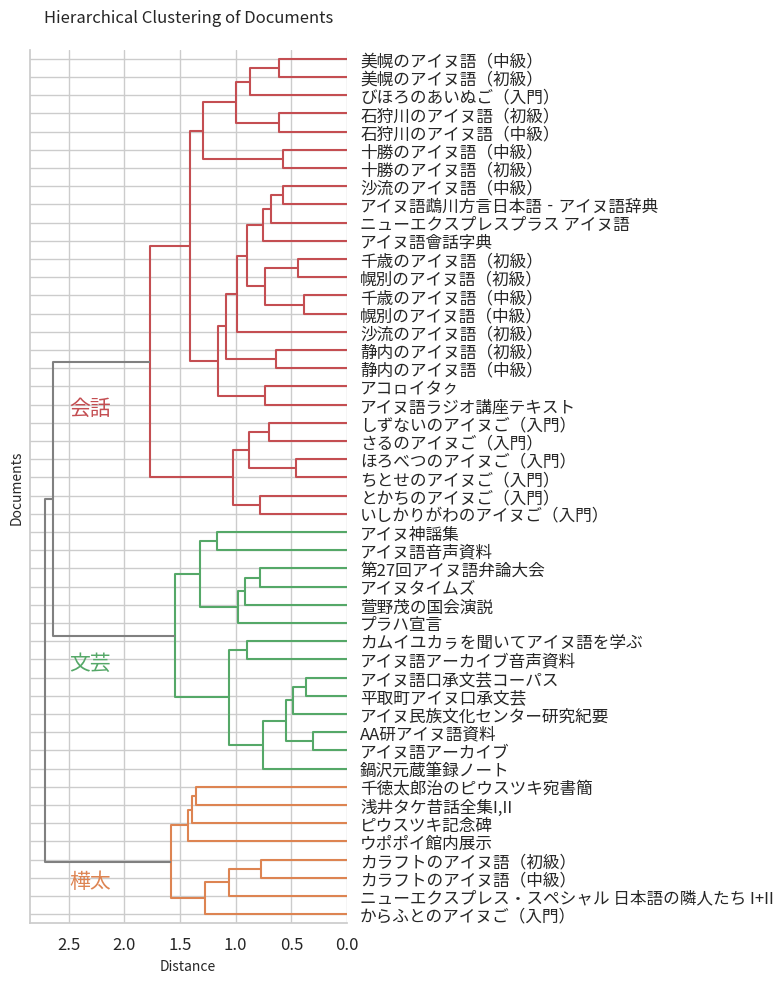

In [140]:
def visualize_document_clustering_horizontal(
    tf_idf_scores, font_path, method="ward", metric="euclidean"
):
    # Load the custom font
    plt.rcParams["font.family"] = ["Noto Sans CJK JP"]
    fontManager.addfont(font_path)
    font_prop = FontProperties(fname=font_path)

    # Convert TF-IDF scores into a DataFrame
    # Rows: documents, Columns: words
    tfidf_df = pd.DataFrame.from_dict(tf_idf_scores, orient="index").fillna(0)

    # Perform hierarchical clustering
    linkage_matrix = linkage(tfidf_df, method=method, metric=metric)

    # Set a visual theme
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(8, 10))

    # Plot the dendrogram (horizontal orientation)
    dendro = dendrogram(
        linkage_matrix,
        labels=tfidf_df.index.tolist(),
        leaf_rotation=0,  # Horizontal leaves don't need rotation
        leaf_font_size=8,  # Smaller font size for document labels
        above_threshold_color="gray",
        orientation="left",  # Horizontal orientation
    )

    # cluster_labels = {0: "Cluster A", 1: "Cluster B", 2: "Cluster C"}
    # cluster_coords = {
    #     label: (icoord[idx].mean(), dcoord[idx].max())
    #     for idx, label in enumerate(cluster_labels)
    # }

    # for cluster, (x, y) in cluster_coords.items():
    #     plt.text(
    #         x, y, cluster,
    #         fontsize=10, fontproperties=font_prop,
    #         color='red', ha='center', va='bottom',
    #         bbox=dict(boxstyle="round,pad=0.3", edgecolor="red", facecolor="white", alpha=0.8)
    #     )

    colors = dendro["leaves_color_list"]

    plt.text(
        2.5,
        20,
        "樺太",
        fontproperties=FontProperties(fname=font_path, size=15),
        color=colors[0],
    )

    plt.text(
        2.5,
        140,
        "文芸",
        fontproperties=FontProperties(fname=font_path, size=15),
        color=colors[8],
    )
    plt.text(
        2.5,
        280,
        "会話",
        fontproperties=FontProperties(fname=font_path, size=15),
        color=colors[25],
    )

    # Title and axis formatting
    plt.title(
        "Hierarchical Clustering of Documents",
        fontsize=12,
        fontproperties=font_prop,
        pad=20,
    )
    plt.xlabel("Distance", fontsize=10, fontproperties=font_prop)
    plt.ylabel("Documents", fontsize=10, fontproperties=font_prop)

    # Apply font properties to tick labels
    plt.xticks(fontproperties=font_prop)
    plt.yticks(fontproperties=font_prop)

    # Remove top and right spines for a cleaner look
    sns.despine()

    # Tight layout for better spacing
    plt.tight_layout()
    plt.savefig(f"output/tf_idf_clustering_dendrogram_h_{method}.png", dpi=350)
    plt.show()


# Example usage:

for method in [
    "single",
    "complete",
    "average",
    "weighted",
    "centroid",
    "median",
    "ward",
]:
    visualize_document_clustering_horizontal(
        tf_idf_scores, "../fonts/NotoSansCJK-Regular.ttc",
        method=method
    )
